In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import sklearn.ensemble
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
base_ordinal = pd.read_csv('../Data/BaseOrdinal.csv')
base_ordinal.shape

(2580, 83)

In [3]:
gbm = GradientBoostingRegressor()

In [4]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [5]:
gbm.fit(X,y)

GradientBoostingRegressor()

In [6]:
gbm.score(X,y)

0.9640482202400422

In [7]:
X_cols = base_ordinal.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.48459153550755235),
 ('GrLivArea', 0.1546902867555024),
 ('TotalBsmtSF', 0.059197761891834025),
 ('1stFlrSF', 0.039644686036008556),
 ('YearBuilt', 0.03858415770331325),
 ('BsmtFinSF1', 0.03229652618394704),
 ('GarageArea', 0.03127655179946284),
 ('Fireplaces', 0.02141804771211418),
 ('2ndFlrSF', 0.019686537749597804),
 ('GarageCars', 0.014774323459129194),
 ('LotArea', 0.012946545941807951),
 ('BsmtQual', 0.011091344137259032),
 ('YearRemodAdd', 0.010361650051504542),
 ('GarageType', 0.010296829813085441),
 ('OverallCond', 0.009083217752470087),
 ('KitchenQual', 0.0072326686157764076),
 ('BsmtFinType1', 0.0046081517415554486),
 ('MasVnrArea', 0.0036867826637188156),
 ('Neighborhood', 0.003344394544065813),
 ('ExterQual', 0.0030496391829913784),
 ('CentralAir', 0.0026619680823535487),
 ('BsmtExposure', 0.0023035250071215497),
 ('PID', 0.0022094420482453338),
 ('MSZoning', 0.0021824434983565713),
 ('SaleCondition', 0.0020674622259519875),
 ('FullBath', 0.0019965143478

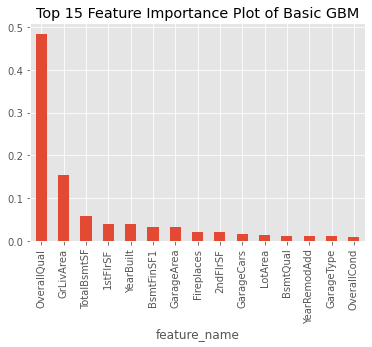

In [8]:
a, b = zip(*sorted_importance[0:15]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic GBM');

## No Scaling......vs ##

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [10]:
gbm.fit(X_train,y_train)

GradientBoostingRegressor()

In [11]:
gbm.score(X_train, y_train)

0.9700789037780999

In [12]:
gbm.score(X_test, y_test)

0.8712117616356831

In [13]:
predicted_value = gbm.predict(X_test)
true_value = y_test

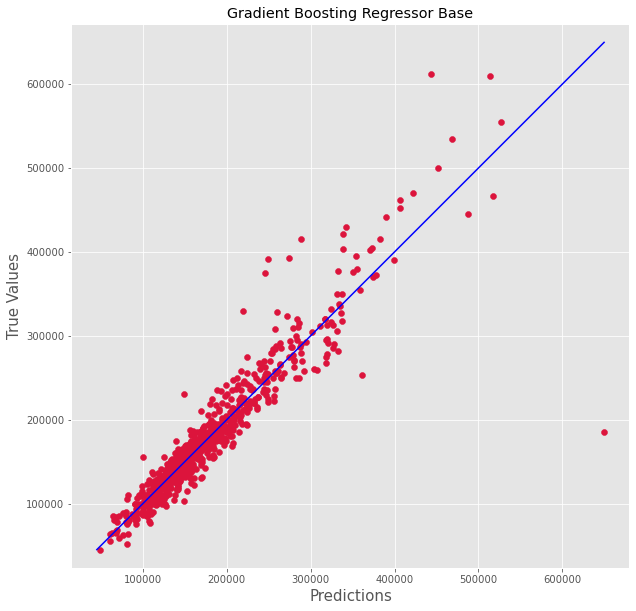

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Gradient Boosting Regressor Base')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()

## Scaling.... ##

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [17]:
gbm.fit(X_train,y_train)

GradientBoostingRegressor()

In [18]:
gbm.score(X_train, y_train)

0.9682922792880019

In [19]:
gbm.score(X_test, y_test)

0.9130947079037226

In [20]:
X_cols = base_ordinal.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.4835491639383034),
 ('GrLivArea', 0.14476960415554024),
 ('TotalBsmtSF', 0.07582051381867132),
 ('GarageArea', 0.0419007804524107),
 ('1stFlrSF', 0.041788755669883104),
 ('YearBuilt', 0.0314246235424301),
 ('GarageCars', 0.030485230823793966),
 ('BsmtFinSF1', 0.02486173985284894),
 ('Fireplaces', 0.016507136604712827),
 ('LotArea', 0.012741518983826838),
 ('BsmtQual', 0.012164353277294829),
 ('2ndFlrSF', 0.012082607660059242),
 ('KitchenQual', 0.009836224642132817),
 ('GarageType', 0.009068258191300404),
 ('YearRemodAdd', 0.008896169405265494),
 ('OverallCond', 0.006189515418073526),
 ('GarageYrBlt', 0.002991311474458634),
 ('CentralAir', 0.0029330505239661283),
 ('MSZoning', 0.0027840287721055796),
 ('Neighborhood', 0.0027420997786005473),
 ('MasVnrArea', 0.002423379149946944),
 ('BsmtFinType1', 0.0023113040397064644),
 ('PID', 0.002090773710507894),
 ('LotFrontage', 0.0017470917614031808),
 ('OpenPorchSF', 0.0016978488710923212),
 ('ScreenPorch', 0.0016275210889554

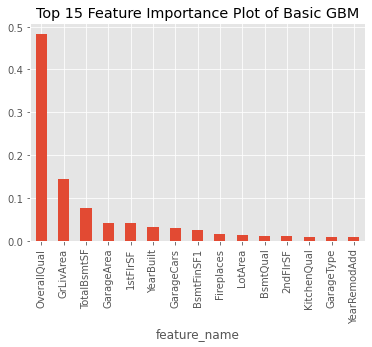

In [21]:
a, b = zip(*sorted_importance[0:15]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic GBM');

In [22]:
predicted_value = gbm.predict(X_test)

In [23]:
true_value = y_test

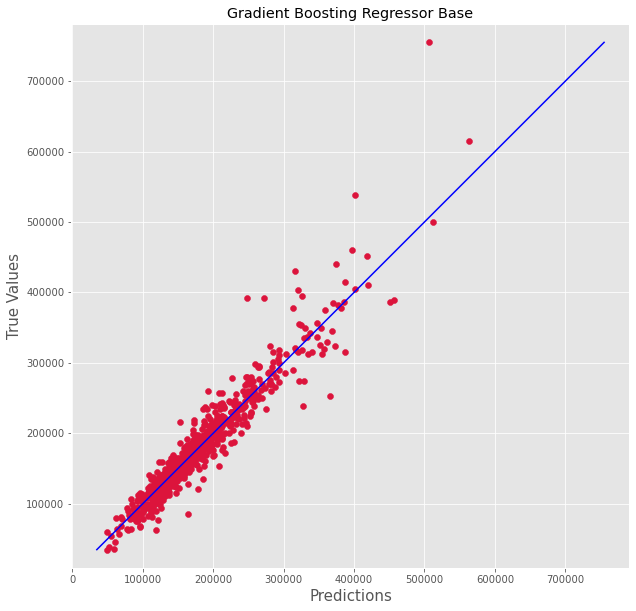

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Gradient Boosting Regressor Base')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()